In [2]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import ISRIStemmer
from snowballstemmer import stemmer
!jupyter nbconvert --to script Preprocess.ipynb

[NbConvertApp] Converting notebook Preprocess.ipynb to script
[NbConvertApp] Writing 4715 bytes to Preprocess.py


#### Hand-made Stemmer

In [3]:
#using hand made stemmer
def process_tweet_1(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style etweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    # # removal
    tweet = re.sub(r'#', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[\u060C\u061B\u061F]', '', tweet)
    # Remove diacritic
    tweet = re.sub(r'[\u064B-\u0652]', '', tweet)
    # yaaa with yaaa with points
    tweet = re.sub(r'\u0649', '\u064A', tweet)
    # Remove tatweel
    tweet = re.sub(r'\u0640', '', tweet)
    # Remove alef with madda
    tweet = re.sub(r'\u0622', '\u0627', tweet)
    # Remove alef with hamza above
    tweet = re.sub(r'\u0623', '\u0627', tweet)
    # Remove alef with hamza below
    tweet = re.sub(r'\u0625', '\u0627', tweet)
    # Remove alef maksura
    tweet = re.sub(r'\u0649', '\u064a', tweet)
    # taa marbota to heh
    tweet = re.sub(r'\u0629', '\u0647', tweet)
    # Remove non-arabic characters
    tweet = re.sub(r'[^\u0621-\u064A]', ' ', tweet)
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet)

    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]
    return filtered_tokens

#### NLTK Stemmer

In [4]:
#using the nltk stemmer
def process_tweet_2(tweet):
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]

    stemmer = ISRIStemmer()
    filtered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    filtered_tokens = [re.sub(r'[^\u0621-\u064A]', '', token) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token != '']

    return filtered_tokens


#### 3rd Party Stemmer

In [ ]:
def process_tweet_3(tweet):
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'(.)\1+', r'\1', tweet)
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]
    ar_stemmer = stemmer("arabic")
    filtered_tokens = [ar_stemmer.stemWord(token) for token in filtered_tokens]
    filtered_tokens = [re.sub(r'[^\u0621-\u064A]', '', token) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token != '']
    
    return filtered_tokens




#### Testing & Running the Preprocessing on the Dataset

In [5]:
from IPython.utils import io
with io.capture_output() as captured:  
   %run ../../1-Preprocessing/DataInsight/DataInsight.ipynb import x, y1, y2, X, Y1, Y2

length = len(x)
index = np.random.randint(0, length)
test = x[index]
display(test)
display(' '.join(process_tweet_1(test)))
display(' '.join(process_tweet_2(test)))
display(' '.join(process_tweet_3(test)))

'حاخام إسرائيلي: لقاح كورونا يحوّل الأشخاص إلى مثليين!<LF>https://t.co/6xsO3CalJF'

'حاخام اسرائيلي لقاح كورونا يحول الاشخاص الي مثليين'

'حاخام اسرائيلي لقح كورو يحل شخص ثلي'

In [6]:
selector = 3
Preprocessing = {"approach": "Hand-made" if selector==1 else "NLTK" if selector==2 else "Snowball", "max_len": 0}
preprocess_tweet = lambda tweet: process_tweet_1(tweet) if selector==1 else process_tweet_2(tweet) if selector==2 else process_tweet_3(tweet)
x = [preprocess_tweet(tweet) for tweet in x]
X = [preprocess_tweet(tweet) for tweet in X]
y1, y2 = y1, y2
Y1, Y2 = Y1, Y2

#### Tweet Length Histogram

The average length of the tweets is:  19.44547796222095


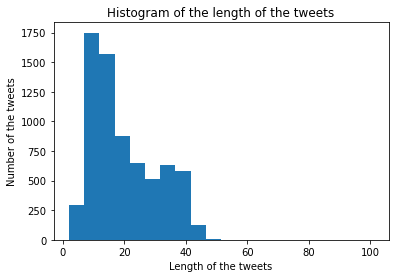

In [7]:
# visualize a histogram of the length of the tweets
hist = [len(tweet) for tweet in x]
# find the   average length of the tweets
avg = np.mean(hist)
print('The average length of the tweets is: ', avg)
plt.hist(hist, bins=20)
plt.title('Histogram of the length of the tweets')
plt.xlabel('Length of the tweets')
plt.ylabel('Number of the tweets')
plt.show()

#### Clipping and Padding Tweets 

In [8]:
# clip the tweets to 50 words and pad the rest with 'pad'
max_len = 50
Preprocessing["max_len"] = max_len
x = [tweet[:max_len] if len(tweet) > max_len else tweet + ['pad'] * (max_len - len(tweet)) for tweet in x]
X = [tweet[:max_len] if len(tweet) > max_len else tweet + ['pad'] * (max_len - len(tweet)) for tweet in X]

#### Building the Vocabulary

In [9]:
# build the vocabulary from x and X
words = []
for tweet in x + X:
    words.extend(tweet)

In [10]:
# vocabulary dictionary
vocabulary = {word : index for index, word in enumerate(set(words))}
vocab_statistics = Counter(words)
display(vocab_statistics.most_common(20))
print('The size of the vocabulary is: ', len(vocabulary))

[('pad', 95665),
 ('لقاح', 7599),
 ('كورونا', 5151),
 ('علي', 2319),
 ('الجرعه', 1229),
 ('الصحه', 1158),
 ('اللقاح', 1155),
 ('ان', 1108),
 ('كوفيد', 975),
 ('الاولي', 962),
 ('يتلقي', 871),
 ('الي', 867),
 ('الله', 803),
 ('تطعيم', 778),
 ('فايزر', 756),
 ('فيروس', 708),
 ('جرعه', 705),
 ('ضد', 664),
 ('عاجل', 512),
 ('اليوم', 488)]

The size of the vocabulary is:  25593


#### Converting Y to One-hot Vectors then to Discrete 0-Indexed Integers

In [12]:
# Convert y1 and y2 to one hot
y1 = np.array([np.eye(3)[i] for i in y1])
y2 = np.array([np.eye(10)[i] for i in y2])

Y1 = np.array([np.eye(3)[i] for i in Y1])
Y2 = np.array([np.eye(10)[i] for i in Y2])

# Most modells want a discrete 0-indexed integer for the class 
y1, y2 = np.argmax(y1, axis=1), np.argmax(y2, axis=1)
Y1, Y2 = np.argmax(Y1, axis=1), np.argmax(Y2, axis=1)

y1, y2 = np.array(y1), np.array(y2)
Y1, Y2 = np.array(Y1), np.array(Y2)
voc_size = len(vocabulary) 
